In [30]:
from sklearn.model_selection import cross_val_score
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
samples = pd.read_csv('german_credit.csv')
N = samples.shape[0]

In [20]:
y = samples['Creditability'].reshape(1, N)[0]
x = np.array(samples)
x = np.array([elem[1:] for elem in x]).reshape(N, 20)

/home/nimloth/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [21]:
model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:
import pydotplus

In [23]:
feature_names = samples.columns[1:]
feature_names = [str(e) for e in feature_names]
feature_names = [e.replace('&', 'and') for e in feature_names]

In [24]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=feature_names,  
                         class_names=samples.columns[0],  
                         filled=True, rounded=True,  
                         special_characters=True)

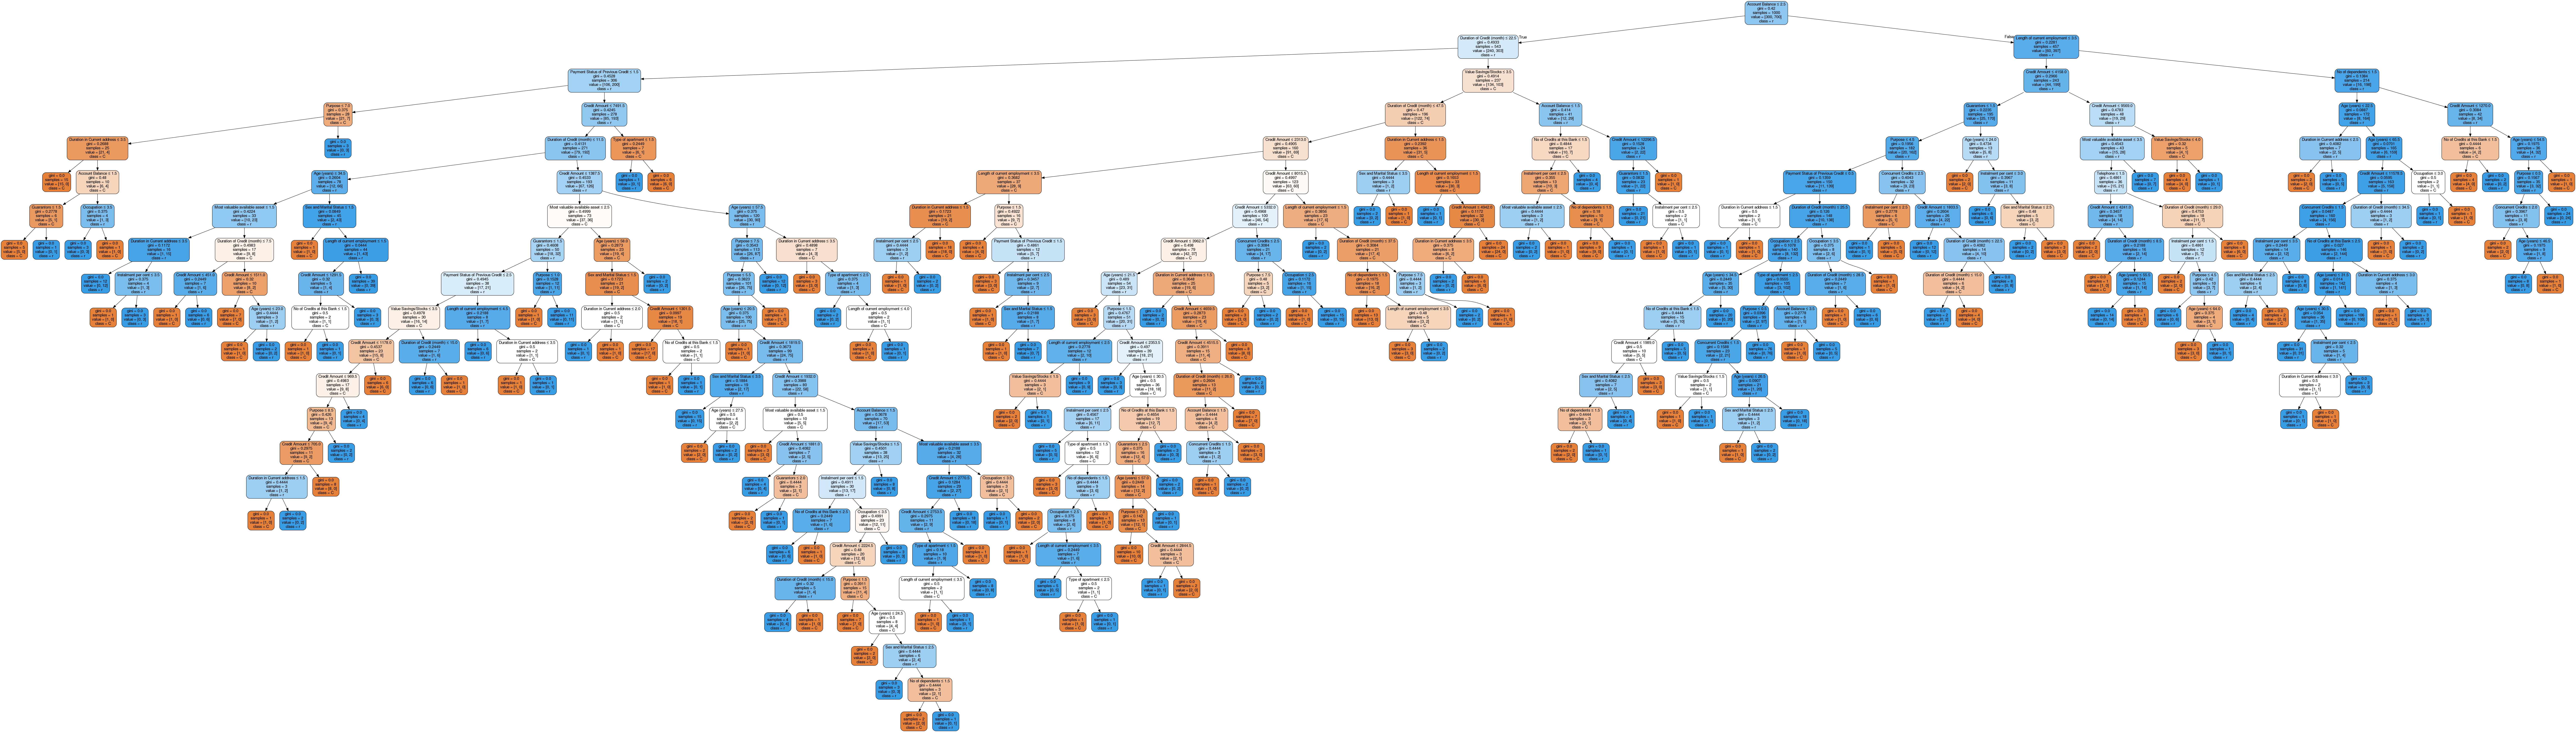

In [25]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

Ой, сложно.

In [26]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=feature_names,  
                         class_names=['Rejected', 'Accepted'],  
                         filled=True, rounded=True,  
                         special_characters=True)

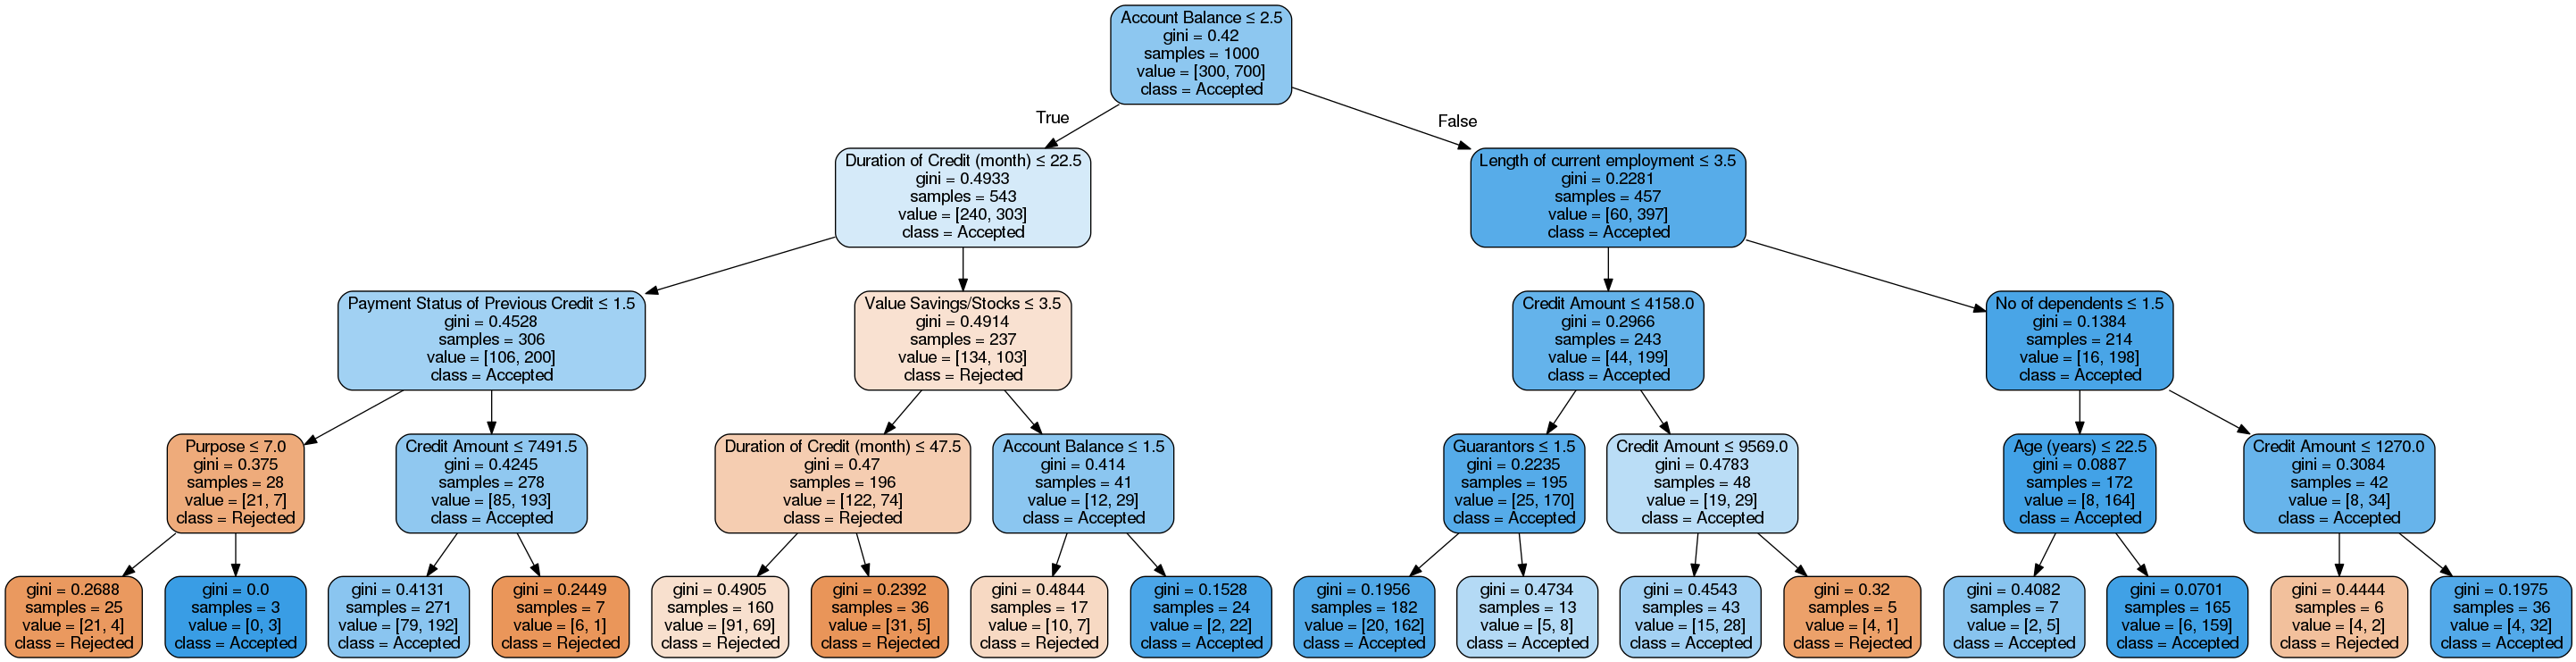

In [28]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

Первым делом он оценивает сколько денег на счету у человека, что явный признак его благополучия, и если денег слишком мало, то он отправляет его в поддерево, где больше реджектов. Но если кредит ненадолго, то туда, где реджектов чуть меньше, инае, где больше. Если же денег на счету много, то снова думает. Например, если человек работал не очень долго, но просит маленький кредит - то пожалуйста. Если же работает много, да у него на шее еще никто не висит - то, тоже пожалуйста. Иначе можно и оотказ получить. Вроде, логично.

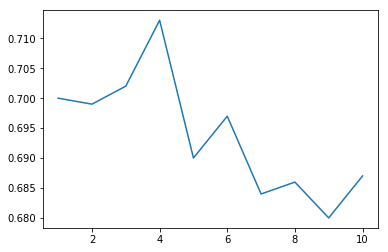

In [31]:
accuracy = []
for depth in range(1, 11):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    accuracy.append(cross_val_score(model, x, y).mean())
plt.plot(range(1, 11), accuracy)
plt.show()

Самые лучший результат показывает дерево глубины 4, на него мы уже посмотрели... оно и правда ничего, логичное.
Видно, что деревья большой глубины смысла особо делать нет.